In [2]:
#importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/Churn_Modelling.csv')  #importing dataset 'Churn_Modelling.csv
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [4]:
data.columns[data.isna().any()]    #checking for null values

Index(['Geography', 'Age', 'HasCrCard', 'IsActiveMember'], dtype='object')

In [5]:
data.dropna(inplace=True)       #removing the missing values
data.shape     #shape of the dataset after droping NaN values

(9998, 14)

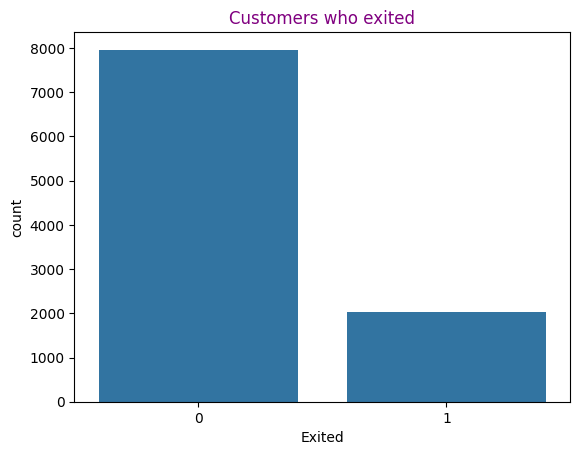

'\nFrom the graph it can be drawn that\n  ->The bank lost around 2000 customers while 8000 still remain. We can say that the bank is still\n    in a good position but needs to decrease the number of leaving customers\n\n'

In [6]:
#Bar chart for customers who left the bank
sns.countplot(x='Exited',data=data)
plt.title('Customers who exited',color='purple')
plt.show()


"""
From the graph it can be drawn that
  ->The bank lost around 2000 customers while 8000 still remain. We can say that the bank is still
    in a good position but needs to decrease the number of leaving customers

"""

In [7]:
#mean relation of customers who left in numerical columns
data.iloc[:,[3,6,7,8,9,10,11,12,13]].groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.839447,37.405531,5.033794,72738.539607,1.544221,0.707161,0.554271,99751.154690
1,645.413641,44.836605,4.931796,91100.672198,1.475466,0.699215,0.360648,101461.468916


'\nFrom the graphs it can be drawn that :\n-> people in the age of 40 & older are more likely leaving the bank. Therefore the bank will need to\n   introduce necessary schemes for older people. Age specific marketing can also help.\n'

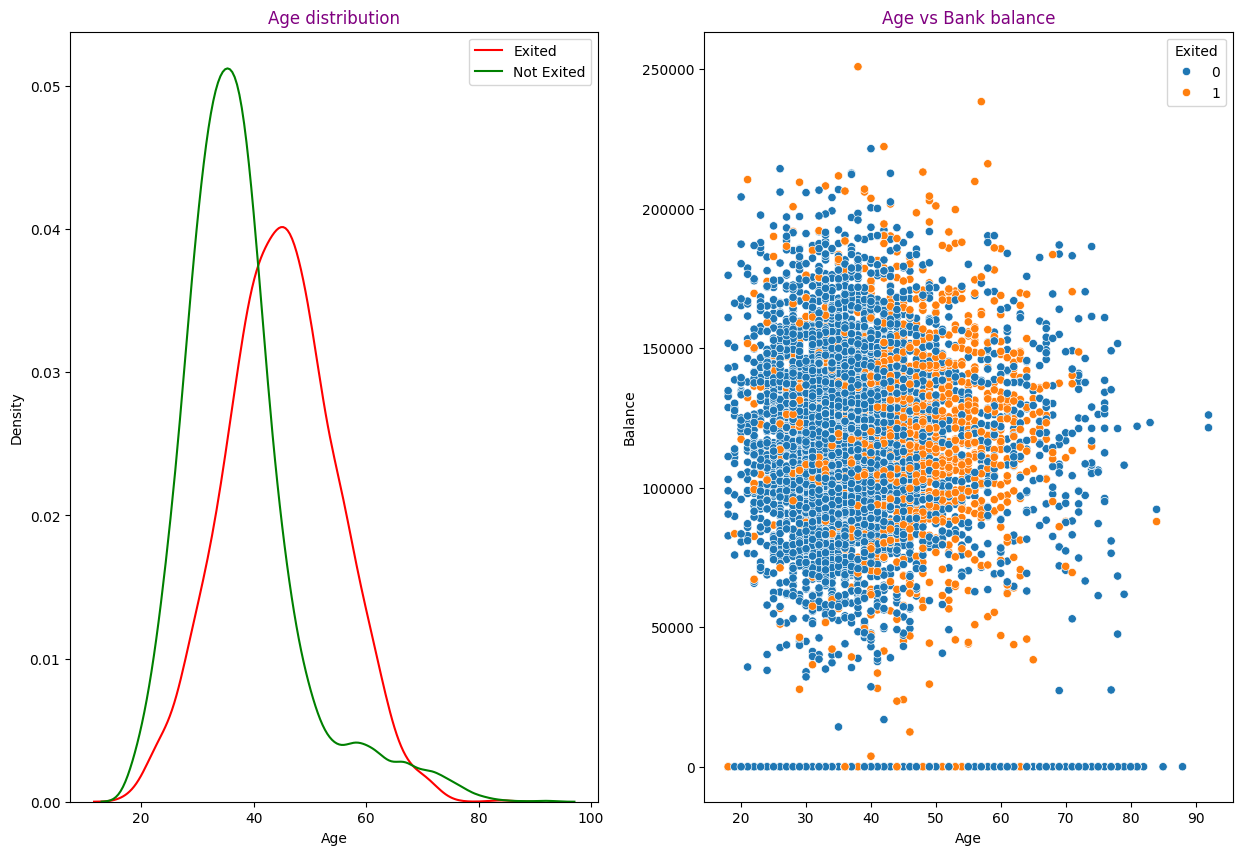

In [35]:

fig,ax=plt.subplots(1,2,figsize=(15,10))
#Density graph of age
sns.kdeplot(data['Age'][data['Exited']==1],color='red',ax=ax[0])
sns.kdeplot(data['Age'][data['Exited']==0],color='green',ax=ax[0])
ax[0].legend(['Exited','Not Exited'])
ax[0].set_title('Age distribution',color='purple')

#Age vs Bank Balance scatterplot
sns.scatterplot(x='Age',y='Balance',data=data,hue='Exited',ax=ax[1])
ax[1].set_title('Age vs Bank balance',color='purple')



"""
From the graphs it can be drawn that :
-> people in the age of 40 & older are more likely leaving the bank. Therefore the bank will need to
   introduce necessary schemes for older people. Age specific marketing can also help.
"""

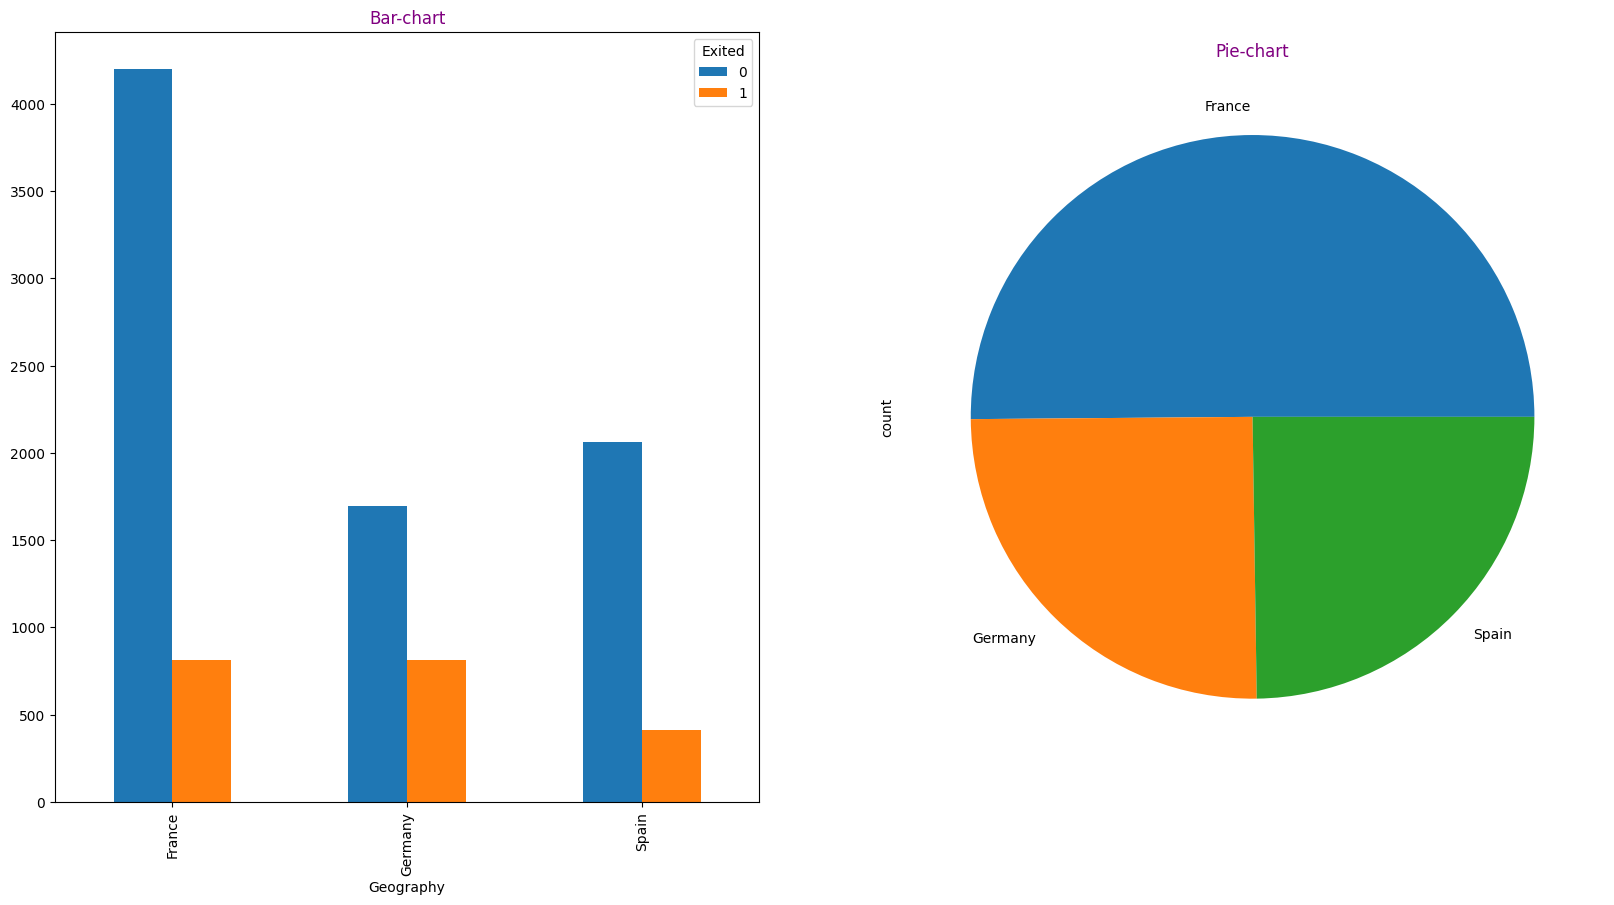

'\nFrom the graphs it can be drawn that:\n->Majority of the customers are from France. Inorder to increase revenue the bank should\n  gather customers from other countries by providing suitable incentives and plans etc.\n'

In [9]:
#Geographical relations
fig,ax=plt.subplots(1,2,figsize=(20,10))
pd.crosstab(data['Geography'],data['Exited']).plot(kind='bar',ax=ax[0])
ax[0].set_title('Bar-chart',color='purple')

data['Geography'].value_counts().plot(kind='pie',ax=ax[1])
ax[1].set_title('Pie-chart',color='purple')

plt.show()

"""
From the graphs it can be drawn that:
->Majority of the customers are from France. Inorder to increase revenue the bank should
  gather customers from other countries by providing suitable incentives and plans etc.
"""


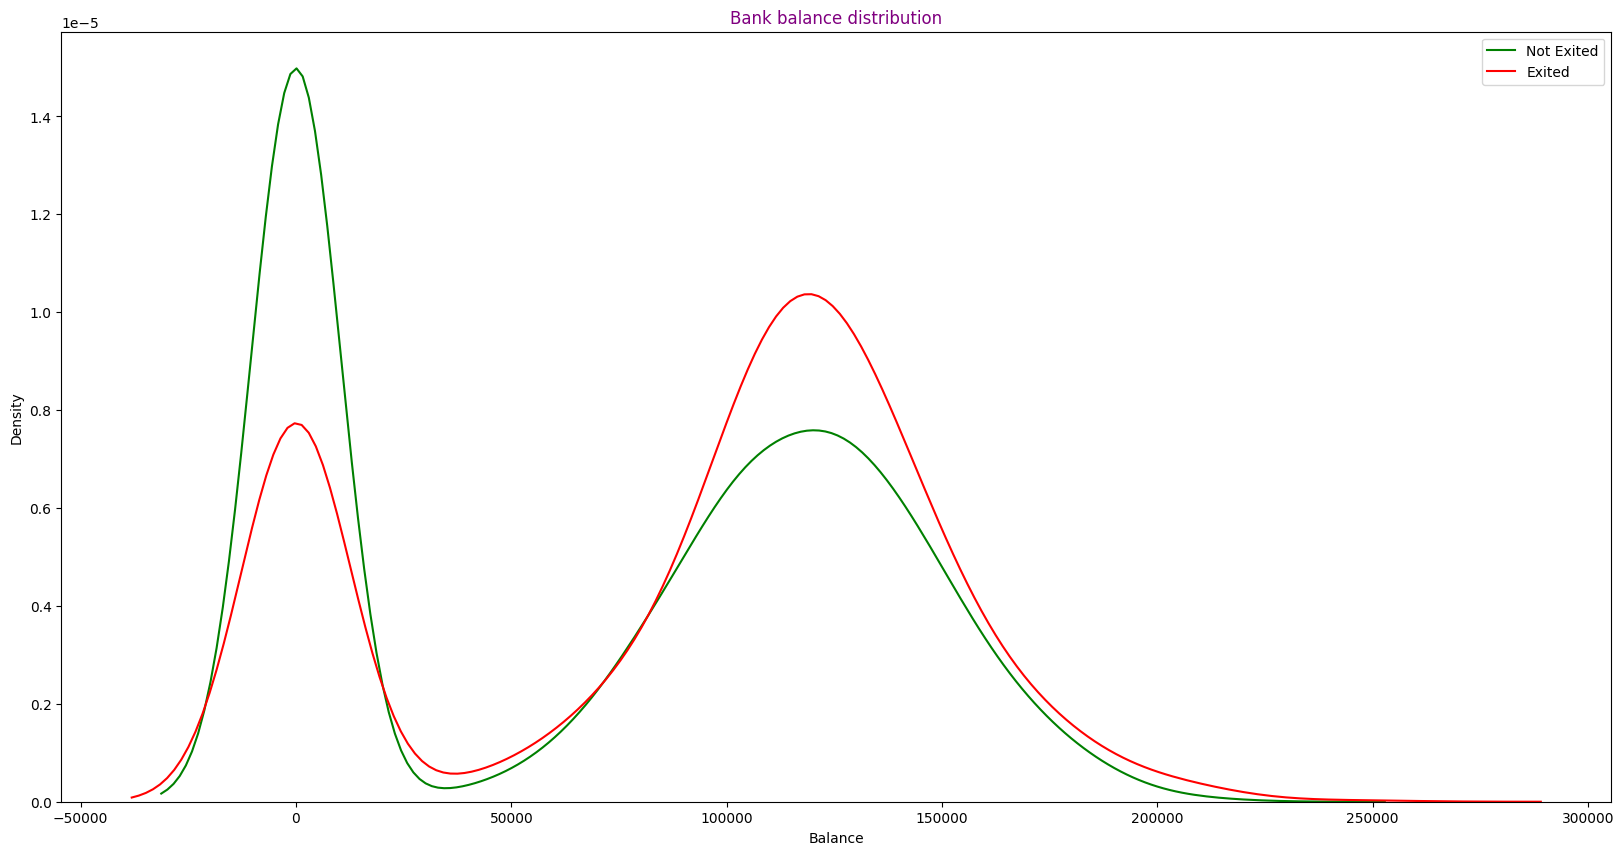

'\nFrom the graph it can be drawn that:\n->Customers who have a higher bank balance are more likely to leave the bank.\n->Customers with low bank balance are more likely to remain.\n  \n  Therefore the bank should focus on retaining customers with high bank balance by introducing\n  satisfactory interst rates and other incentives.Customers with low bank balance\n  should also be paid attention to improve their situation.\n'

In [10]:
#Bank balance distribution

plt.figure(figsize=(20,10))
sns.kdeplot(data['Balance'][data['Exited']==0],color='green')
sns.kdeplot(data['Balance'][data['Exited']==1],color='red')
plt.title('Bank balance distribution',color='purple')
plt.legend(['Not Exited','Exited'])
plt.show()

"""
From the graph it can be drawn that:
->Customers who have a higher bank balance are more likely to leave the bank.
->Customers with low bank balance are more likely to remain.

  Therefore the bank should focus on retaining customers with high bank balance by introducing
  satisfactory interst rates and other incentives.Customers with low bank balance
  should also be paid attention to improve their situation.
"""




'\nFrom the graph it can be drawn that:\n->Majority of the customers are active members\n->Customers who are not active are more likely to leave the bank\n\nTherefore the bank should focus on making members active by introducing \ncustomer friendly schemes and other programs.\n'

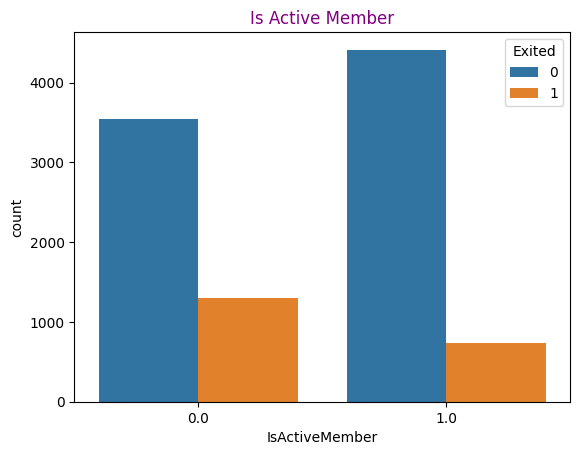

In [11]:
#Bar-chart for IsActiveMember
sns.countplot(x='IsActiveMember',hue='Exited',data=data)
plt.title('Is Active Member', color='purple')

'''
From the graph it can be drawn that:
->Majority of the customers are active members
->Customers who are not active are more likely to leave the bank

Therefore the bank should focus on making members active by introducing
customer friendly schemes and other programs.
'''

'\nFrom the graph it can be drawn that:\n->Majority of the customers have taken 1-2 products while minimal amount of people use the rest\n\nTherefore necessary measures can be taken to increase the number of products taken by the\ncustomers like improvement of products and proper advertisements.\n'

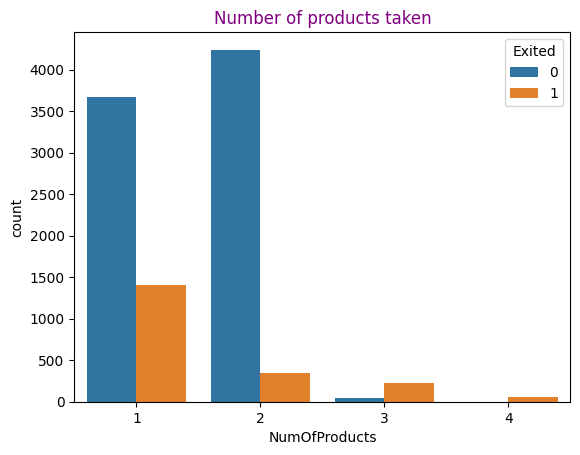

In [12]:
#Bar-chart on the number of products taken per person
sns.countplot(x='NumOfProducts',hue='Exited',data=data)
plt.title('Number of products taken',color='purple')

'''
From the graph it can be drawn that:
->Majority of the customers have taken 1-2 products while minimal amount of people use the rest

Therefore necessary measures can be taken to increase the number of products taken by the
customers like improvement of products and proper advertisements.
'''


In [13]:
data.groupby('Geography')['Balance'].mean()

Geography
France      62088.181830
Germany    119712.325375
Spain       61792.423744
Name: Balance, dtype: float64

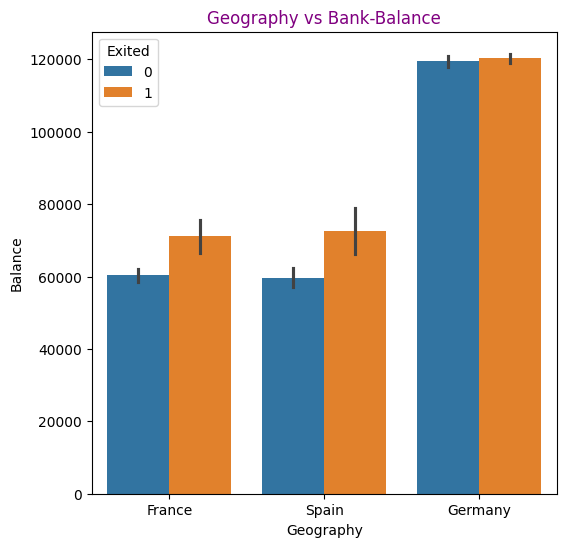

'\nFrom the data and graph it can be drawn that\n->customers who are from Germany have a higher bank balance \n->The customers who are leaving the bank have high bank balnces int their geographic categories.\n\nTherefore bank must try its best to retain and bring more customers with high bank balances.It should mostly try to retain the German customers\nas they have highest bank balance than the other two countries. This will help in increasing revenue of the bank.\n'

In [14]:
#Geography vs Bank balance graph
plt.figure(figsize=(6,6))
sns.barplot(x='Geography',y='Balance',data=data,hue='Exited')
plt.title('Geography vs Bank-Balance',color='purple')
plt.show()

"""
From the data and graph it can be drawn that
->customers who are from Germany have a higher bank balance
->The customers who are leaving the bank have high bank balnces int their geographic categories.

Therefore bank must try its best to retain and bring more customers with high bank balances.It should mostly try to retain the German customers
as they have highest bank balance than the other two countries. This will help in increasing revenue of the bank.
"""